# Social Media Sentiment Analysis with Python

Yora Radityohutomo, Aug 21 2019. Updated Aug 23, 2019

Create a machine learning model to tag social media posts with sentiment (i.e. sentiment Analysis).

This research mostly using Pandas, NLTK and Scikit-Learn library.

##  Description

Given social media datasets in Dutch language. The task is to predict whether a content contains positive, negative, or neutral sentiment. This is a supervised learning task where given a text string, we have to categorize the text string into predefined categories.

## Explore the Dataset

### Importing the Required Libraries

In [3]:
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

### Load Datasets

In [5]:
pd_text1 = pd.read_json('dutch_data/dutch1.json')
pd_text1 = pd_text1[['content', 'sentiment']]
print('Size of dataset 1 = {}'.format(len(pd_text1)))

Size of dataset 1 = 5200


In [6]:
pd_text2 = pd.read_json('dutch_data/dutch2.json')
pd_text2 = pd_text2[['content', 'sentiment']]
print('Size of dataset 2 = {}'.format(len(pd_text2)))

Size of dataset 2 = 4200


In [7]:
pd_text3 = pd.read_json('dutch_data/dutch3.json')
pd_text3 = pd_text3[['content', 'sentiment']]
print('Size of dataset 3 = {}'.format(len(pd_text3)))

Size of dataset 3 = 3300


In [8]:
pd_text4 = pd.read_json('dutch_data/dutch4.json')
pd_text4 = pd_text4[['content', 'sentiment']]
print('Size of dataset 4 = {}'.format(len(pd_text4)))

Size of dataset 4 = 5300


### Concat All Datasets

In [9]:
# Merge all dataset
final_df = pd_text1.append([pd_text2, pd_text3, pd_text4])
print('Total size of datasets = {}'.format(len(final_df)))

Total size of datasets = 18000


In [10]:
final_df.head()

,content,sentiment
0,Onderzoek moord Endstra\nKlippen\nHet onderzoe...,
1,Een dorsmachine wordt gebruikt voor het dorsen...,neutral
2,"De plant groeit vanuit een flinke bol,eerst on...",neutral
3,Sommige planten verdwijnen gewoon\nFoto Taco v...,
4,Het is wetenschappelijk bewezen dat een slaapt...,


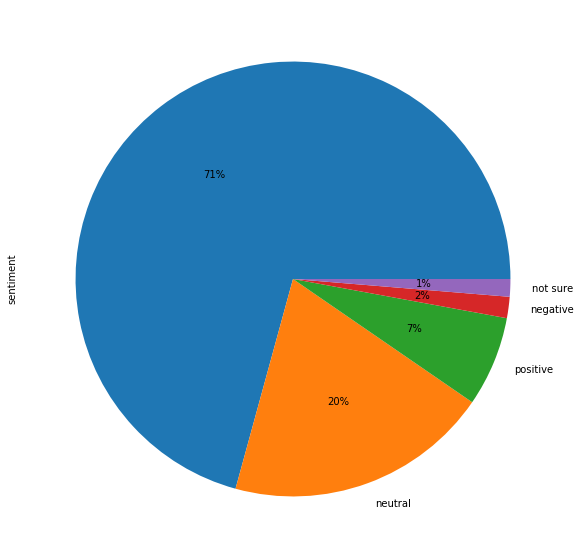

In [11]:
final_df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

### Removing Unlabeled Data
Findings on existing data shows that there is much data not having sentiment category (empty or null) as 71% of all dataset. This data mark as unlabeled data and have to be removed.

In [12]:
# Remove data with blank sentiment
final_df = final_df[final_df['sentiment'].notnull()]
final_df= final_df[final_df.sentiment != '']
print('Size of datasets after cleaning = {}'.format(len(final_df)))

Size of datasets after cleaning = 3314


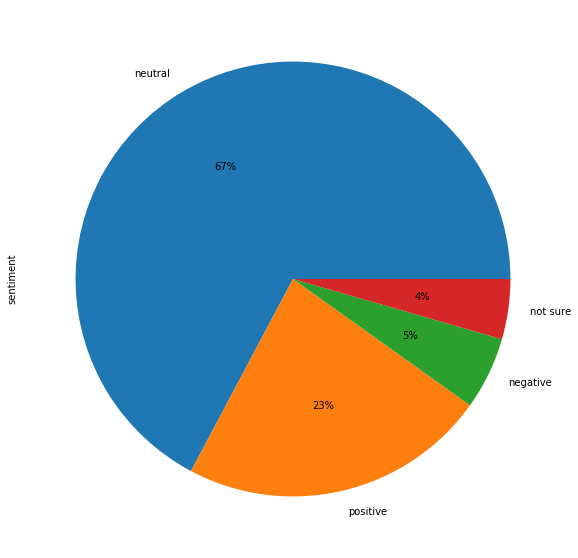

In [13]:
final_df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [14]:
final_df.groupby('sentiment').describe()

content                                                            \
            count unique                                                top   
sentiment                                                                     
negative      179    176  RT @Soesah #kijkenindeziel @louisefresco is vo...   
neutral      2228   2122  Bij suikerbieten steeg de opbrengst van 41 naa...   
not sure      148    146  @estherouwehand je bedoelt dieraardiger? Voor ...   
positive      759    730  @hendrikcomvali1 @Stichtingdons grote kansen v...   

                
          freq  
sentiment       
negative     3  
neutral      4  
not sure     2  
positive     3

### Data Cleaning

In [15]:
_stopwords = set(stopwords.words('dutch') + list(punctuation) + ['AT_USER','URL','rt'])

In [16]:
def text_cleaning(text):
    text = text.lower() # convert text to lower-case
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text) # remove URLs
    text = re.sub('@[^\s]+', 'AT_USER', text) # remove usernames
    text = re.sub(r'#([^\s]+)', r'\1', text) # remove the # in #hashtag
    text = re.sub("[’.'‘]", '', text) # remove some special character
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub('\d+', '', text) # remove digits

    text = nltk.word_tokenize(text) # remove repeated characters 
    text = [word for word in text if word not in _stopwords]

    return " ".join(text)


In [17]:
# cleaning data
clean_sentences = []

for sentence in final_df['content']:
    clean_sentences.append(text_cleaning(sentence))
    

In [18]:
def freq_distribution(text):
    text = text_cleaning(text)
    text = nltk.word_tokenize(text)

    return nltk.FreqDist(text)


In [19]:
def show_wordcloud(fdist, color):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color=color).generate(" ".join(fdist))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

#### Split dataset by sentiment category

In [20]:
split_df = {k: v for k, v in final_df.groupby('sentiment')}

### Negative Sentiment

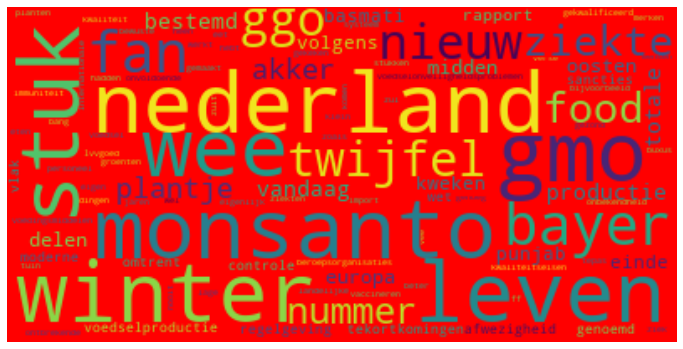

In [21]:
negative_text = '. '.join(split_df['negative']['content'])
negative_fdist = freq_distribution(negative_text)
show_wordcloud(negative_fdist, 'red')

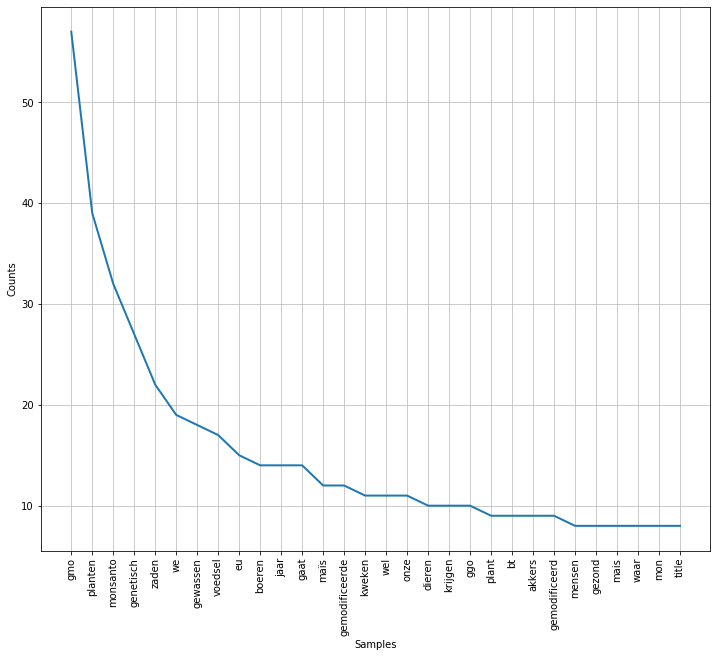

In [22]:
negative_fdist.plot(30,cumulative=False)

### Positive Sentiment

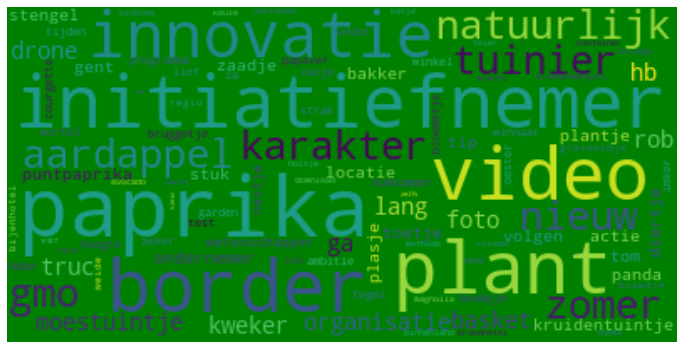

In [23]:
positive_text = '. '.join(split_df['positive']['content'])
positive_fdist = freq_distribution(positive_text)
show_wordcloud(positive_fdist, 'green')

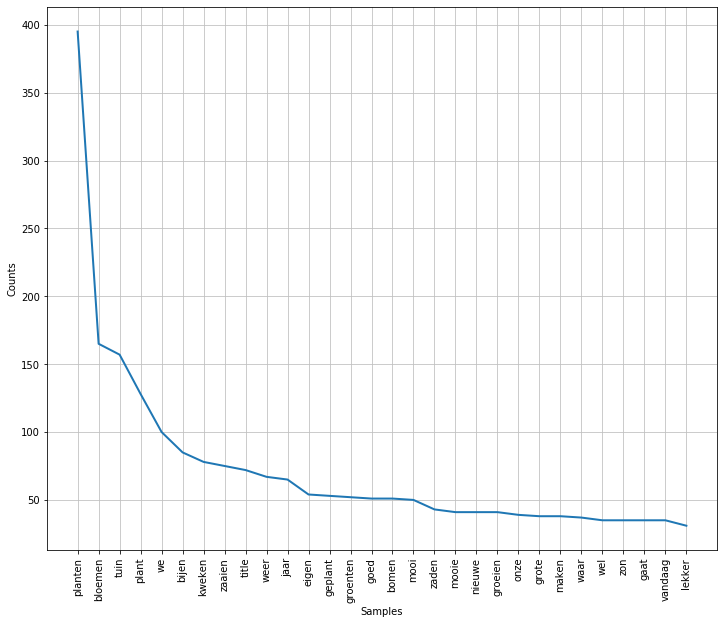

In [24]:
positive_fdist.plot(30,cumulative=False)

### Neutral Sentiment

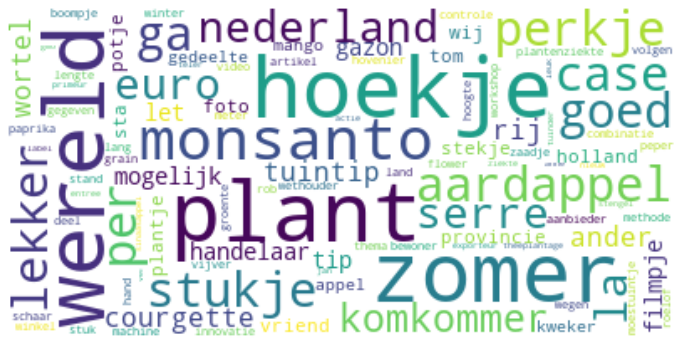

In [25]:
neutral_text = '. '.join(split_df['neutral']['content'])
neutral_fdist = freq_distribution(neutral_text)
show_wordcloud(neutral_fdist, 'white')

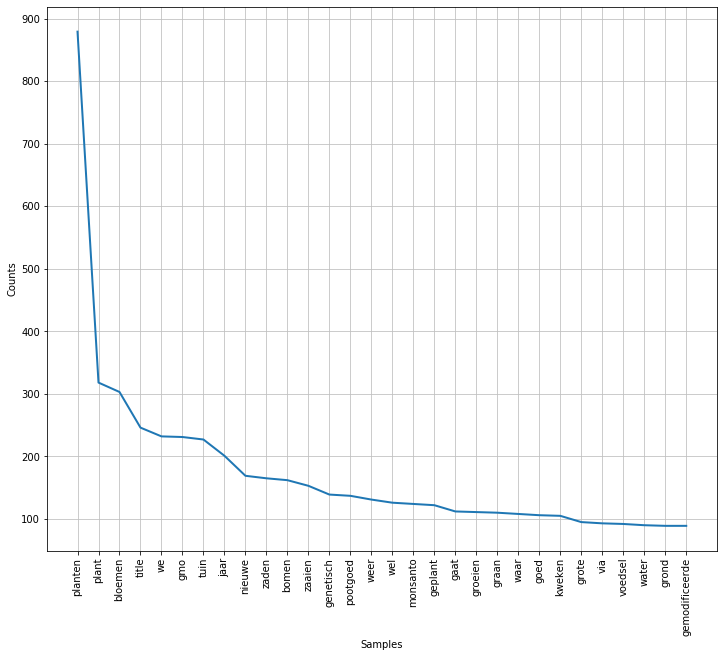

In [26]:
neutral_fdist.plot(30,cumulative=False)

### Sentiment = Not Sure

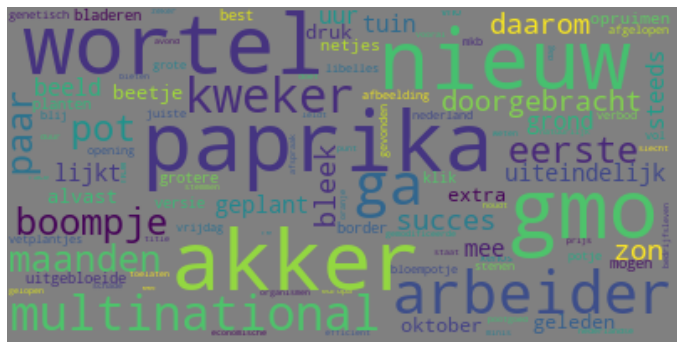

In [27]:
not_sure_text = '. '.join(split_df['not sure']['content'])
not_sure_fdist = freq_distribution(not_sure_text)
show_wordcloud(not_sure_fdist, 'grey')

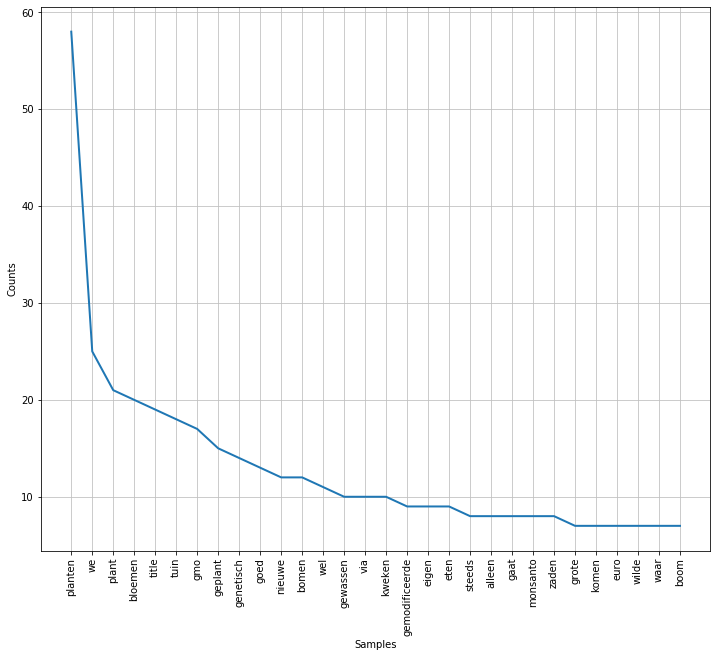

In [28]:
not_sure_fdist.plot(30,cumulative=False)

Some of the common words on positive and negative post can be interpreted quite neutral, such as "plant","jaar", etc. But we can see some of the other words make sense to be on that sentiment.

## Feature Extraction

As we all know, all machine learning algorithms are good with numbers; we have to extract or convert the text data into numbers without losing much of the information. One way to do such transformation is Bag-Of-Words (BOW) which gives a number to each word but that is very inefficient. So, a way to do it is by CountVectorizer: it counts the number of words in the document i.e it converts a collection of text documents to a matrix of the counts of occurences of each word in the document.

In [29]:
vectorizer = CountVectorizer(min_df = 2)
processed_features = vectorizer.fit_transform(clean_sentences)

In [30]:
processed_features = processed_features.toarray()
print('Total Bag of Words / Feature : {}'.format(len(vectorizer.get_feature_names())))

Total Bag of Words / Feature : 5613


#### List of Feature

In [31]:
vectorizer.get_feature_names()

['aalsmeer',
 'aanbieder',
 'aanbod',
 'aandacht',
 'aande',
 'aandeel',
 'aangeboden',
 'aangebracht',
 'aangedreven',
 'aangegeven',
 'aangekondigd',
 'aangelegd',
 'aangelegde',
 'aangeleverd',
 'aangenamer',
 'aangepast',
 'aangepaste',
 'aangeplant',
 'aangetast',
 'aangetaste',
 'aangetoond',
 'aangevallen',
 'aangeven',
 'aangevoerd',
 'aangevuld',
 'aangezien',
 'aanjager',
 'aankoop',
 'aanleg',
 'aanleggen',
 'aanleiding',
 'aannemer',
 'aanpak',
 'aanpassen',
 'aanpassing',
 'aanpassingen',
 'aanplant',
 'aanplanten',
 'aanrader',
 'aanschaf',
 'aanschaffen',
 'aanschouwen',
 'aanslaan',
 'aanslag',
 'aansluitend',
 'aanspreekt',
 'aantal',
 'aantonen',
 'aantrekkelijk',
 'aantrekkelijke',
 'aantrekken',
 'aantrekkingskracht',
 'aanvoer',
 'aanvraag',
 'aanwezig',
 'aanwezige',
 'aanzien',
 'aanzienlijke',
 'aardappel',
 'aardappelen',
 'aardappelland',
 'aardappelproductie',
 'aardappelrassen',
 'aardappels',
 'aardappelsector',
 'aardappelteelt',
 'aardbei',
 'aardbeien',


In [32]:
vectorizer.vocabulary_

{'dorsmachine': 1139,
 'gebruikt': 1546,
 'dorsen': 1138,
 'ofwel': 3267,
 'oogsten': 3400,
 'graan': 1856,
 'rogge': 3963,
 'gerst': 1700,
 'opkomst': 3449,
 'gebruik': 1542,
 'gemaakt': 1630,
 'machines': 2861,
 'aangedreven': 8,
 'tractor': 4560,
 'plant': 3636,
 'groeit': 1892,
 'vanuit': 4771,
 'flinke': 1456,
 'bol': 713,
 'eerst': 1253,
 'ontstaan': 3378,
 'zomer': 5555,
 'flink': 1455,
 'bekende': 410,
 'bloemen': 655,
 'later': 2681,
 'temperatuur': 4452,
 'boven': 757,
 'komt': 2521,
 'weer': 5293,
 'verder': 4840,
 'hazelaars': 2001,
 'voordat': 5142,
 'pollen': 3695,
 'vrijkomt': 5210,
 'fijn': 1439,
 'lucht': 2831,
 'afkomstig': 129,
 'zogenaamde': 5549,
 'bevat': 533,
 'zoals': 5536,
 'voorkomen': 5151,
 'aanwezig': 54,
 'river': 3952,
 'on': 3303,
 'aardbeien': 67,
 'ko': 2502,
 'zaden': 5472,
 'kruiden': 2579,
 'zondag': 5562,
 'juli': 2345,
 'uur': 4738,
 'slot': 4168,
 'hele': 2026,
 'ergens': 1332,
 'hoekje': 2082,
 'tuin': 4597,
 'stond': 4326,
 'planten': 3638,
 's

### Vector Table

In [37]:
processed_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Example on a text

#### Original sentence

In [38]:
clean_sentences[2]

'temperatuur boven vriespunt komt katjes weer verder openbreken komt katjes elzen hazelaars voordat pollen vrijkomt fijn plantenweefsel lucht afkomstig zogenaamde tapetumweefsel tapetum voedingsweefsel pollenkorrels bevat allergenen zoals pollenkorrels voorkomen'

#### Vector representation

In [39]:
processed_features[2]

array([0, 0, 0, ..., 0, 0, 0])

#### Inverse from vector to feature

In [40]:
vectorizer.inverse_transform(processed_features[2])

[array(['afkomstig', 'bevat', 'boven', 'fijn', 'hazelaars', 'komt',
        'lucht', 'pollen', 'temperatuur', 'verder', 'voordat', 'voorkomen',
        'vrijkomt', 'weer', 'zoals', 'zogenaamde'], dtype='<U26')]

## Modeling - Model creation and evaluation

### Dividing Data into Training and Test Sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, final_df['sentiment'].values, test_size=0.2, random_state=0)

In the code above I use the train_test_split class from the sklearn.model_selection module to divide our data into training and testing set. The method takes the feature set as the first parameter, the label set as the second parameter, and a value for the test_size parameter. We specified a value of 0.2 for test_size which means that our data set will be split into two sets of 80% and 20% data.

### Build Classifier

I will use the Random Forest algorithm, owing to its ability to act upon non-normalized data. The sklearn.ensemble module contains the RandomForestClassifier class that can be used to train the machine learning model using the random forest algorithm. 

In [42]:
text_classifier = RandomForestClassifier(n_estimators=300)

### Train the classifier

In [43]:
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predict the test data

In [44]:
predictions = text_classifier.predict(X_test)

#### Evaluate performance of model

In [45]:
print('Confusion Matrix :')
confusion_matrix(y_test,predictions)

Confusion Matrix :


array([[  2,  27,   0,   3],
       [  5, 406,   9,  26],
       [  0,  24,   2,   5],
       [  0, 116,   2,  36]])

In [46]:
print('Summary of performance :')
print(classification_report(y_test,predictions))

Summary of performance :
              precision    recall  f1-score   support

    negative       0.29      0.06      0.10        32
     neutral       0.71      0.91      0.80       446
    not sure       0.15      0.06      0.09        31
    positive       0.51      0.23      0.32       154

    accuracy                           0.67       663
   macro avg       0.42      0.32      0.33       663
weighted avg       0.62      0.67      0.62       663



In [47]:
print('Accuracy Score :')
accuracy_score(y_test, predictions)

Accuracy Score :


0.6726998491704375

## Conclusion

On this research, the Random Forest classifier can achieved an accuracy of around 67% to predict sentiment value of social media data.
There is some to do to improve the model performance.
* There is much unlabeled data on datasets, they all have to be labeled so it can be trained and enrich the feature of model
* Total datasets of neutral sentiment dominate the other class sentiment. Dataset distribution have to balance for every sentiment class, so there is more knowledge to identify sentiment positive and negative.
* There is some machine learning algorithm that good fit for sentiment analysis purposed, so have to try the other algorithm like logistic regression, SVM, KNN or naive bayes as comparison.